Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [36]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt 
from keras.utils import np_utils
from tensorflow.keras import optimizers
import numpy as np


In [37]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [38]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [39]:

def train():
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optimizers.SGD(lr = 0.1),
          metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return fit_info

fit_info = train()

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4696 - accuracy: 0.8647 - val_loss: 0.2618 - val_accuracy: 0.9229
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9315 - val_loss: 0.2056 - val_accuracy: 0.9378
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1778 - accuracy: 0.9485 - val_loss: 0.1544 - val_accuracy: 0.9546
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1463 - accuracy: 0.9568 - val_loss: 0.1554 - val_accuracy: 0.9530
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1255 - accuracy: 0.9634 - val_loss: 0.1222 - val_accuracy: 0.9628
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.9670 - val_loss: 0.1244 - val_accuracy: 0.9632
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9707 - val_loss: 0.0996 - val_accuracy: 0.9695
Epoch 

In [40]:
## Define model ##

def train_using_decay(decay):
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(500, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(decay)))
    model.add(Dense(300, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(decay)))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optimizers.SGD(lr = 0.1),
          metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return fit_info


In [41]:
# train for 3 regularization
decays = [0.000001, 0.00001, 0.001]
info = []
for i in decays:
    print("[*] Training with {} decay".format(i))
    info.append(train_using_decay(i))



[*] Training with 1e-06 decay
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4041 - accuracy: 0.8869 - val_loss: 0.2326 - val_accuracy: 0.9313
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1917 - accuracy: 0.9451 - val_loss: 0.1571 - val_accuracy: 0.9542
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1402 - accuracy: 0.9600 - val_loss: 0.1249 - val_accuracy: 0.9630
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9686 - val_loss: 0.1112 - val_accuracy: 0.9679
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9739 - val_loss: 0.1043 - val_accuracy: 0.9671
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0895 - val_accuracy: 0.9718
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.0835

In [43]:
hist.history['val_accuracy']

[0.9297000169754028,
 0.9484999775886536,
 0.9606999754905701,
 0.9653000235557556,
 0.9656999707221985,
 0.9706000089645386,
 0.9718999862670898,
 0.9761999845504761,
 0.9767000079154968,
 0.9768000245094299]

[0.979200005531311, 0.9789000153541565, 0.9768000245094299]
[0.9662699997425079, 0.9682099997997284, 0.9642099976539612]
[0.013692117451961812, 0.012310762584998101, 0.014183472834385926]


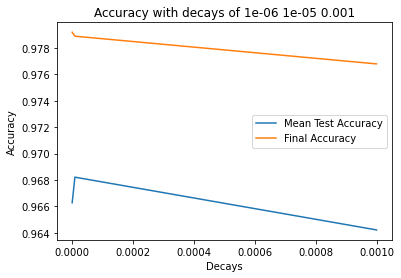

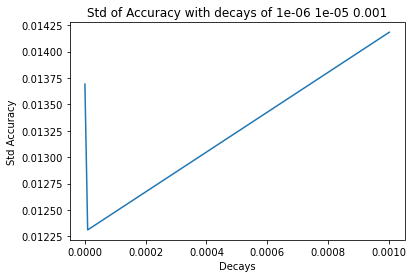

In [42]:
#  Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor
i = 0

x = []
y_mean_acc = []
y_std_acc = []
y_acc = []
for hist in info:
    x.append(decays[i])
    y_mean_acc.append(np.mean(hist.history['val_accuracy'])) # get the mean accuracy of the model
    y_std_acc.append(np.std(hist.history['val_accuracy']))   # get the std of the acc
    y_acc.append(hist.history['val_accuracy'][-1])
    i+=1

print(y_acc)
print(y_mean_acc)
print(y_std_acc)
plt.plot(x, y_mean_acc)
plt.plot(x, y_acc)
#plt.plot(x, y_std_acc)
plt.legend(['Mean Test Accuracy', 'Final Accuracy', 'Std Test Accuracy {}'])
plt.title("Accuracy with decays of {} {} {}".format(decays[0], decays[1], decays[2]))
plt.xlabel("Decays")
plt.ylabel("Accuracy")
plt.show()

plt.plot(x, y_std_acc)
plt.title("Std of Accuracy with decays of {} {} {}".format(decays[0], decays[1], decays[2]))
plt.xlabel("Decays")
plt.ylabel("Std Accuracy")
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


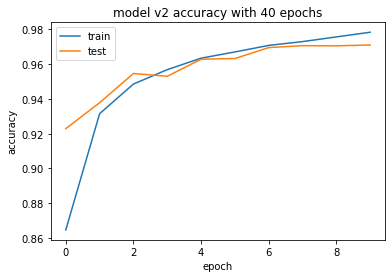

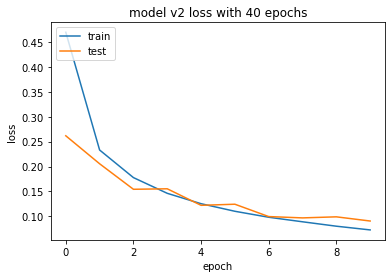

In [44]:
# Plot Accuracy of first model 

# list all data in history
print(fit_info.history.keys())
# summarize history for accuracy
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model v2 accuracy with 40 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_info.history['loss'])
plt.plot(fit_info.history['val_loss'])
plt.title('model v2 loss with 40 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 3) ConvNet

In [45]:

## Define model ##

def train_conv():
    model = Sequential()

  #model.add(Flatten())
  # Multiple Conv2D layer 
    model.add(Conv2D(32, kernel_size=3, padding="valid", input_shape=(28, 28, 1), activation = 'relu')),
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1))),
    model.add(Conv2D(64, kernel_size=3, padding="valid", activation = 'relu')),
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1))),
    model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu')),
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1))),
    model.add(Flatten()),
    model.add(Dense(200, activation='relu')),
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer="adam",
          metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return fit_info



In [46]:
train_conv()

Epoch 1/10
469/469 [==============================] - 131s 279ms/step - loss: 0.1157 - accuracy: 0.9643 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 2/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 3/10
131/469 [=======>......................] - ETA: 1:53 - loss: 0.0233 - accuracy: 0.9928

KeyboardInterrupt: 

### Question 4) Auto-Encoder for denoising


In [13]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [14]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1882 - val_loss: 0.1511
Epoch 2/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1450 - val_loss: 0.1384
Epoch 3/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1362 - val_loss: 0.1328
Epoch 4/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1315 - val_loss: 0.1299
Epoch 5/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1281 - val_loss: 0.1272
Epoch 6/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1259 - val_loss: 0.1270
Epoch 7/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1242 - val_loss: 0.1248
Epoch 8/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1231 - val_loss: 0.1244
Epoch 9/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1220 - val_loss: 0.1233
Epoch 10/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1210 - val_loss: 0.1230

dict_keys(['loss', 'val_loss'])


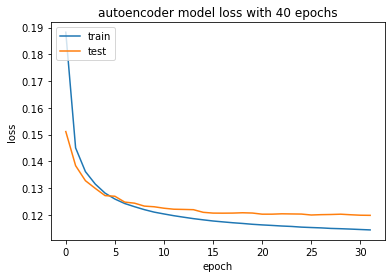

In [16]:
# Plot Accuracy of first model 

# list all data in history
print(fit_info_AE.history.keys())

# summarize history for loss
plt.plot(fit_info_AE.history['loss'])
plt.plot(fit_info_AE.history['val_loss'])
plt.title('autoencoder model loss with 40 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

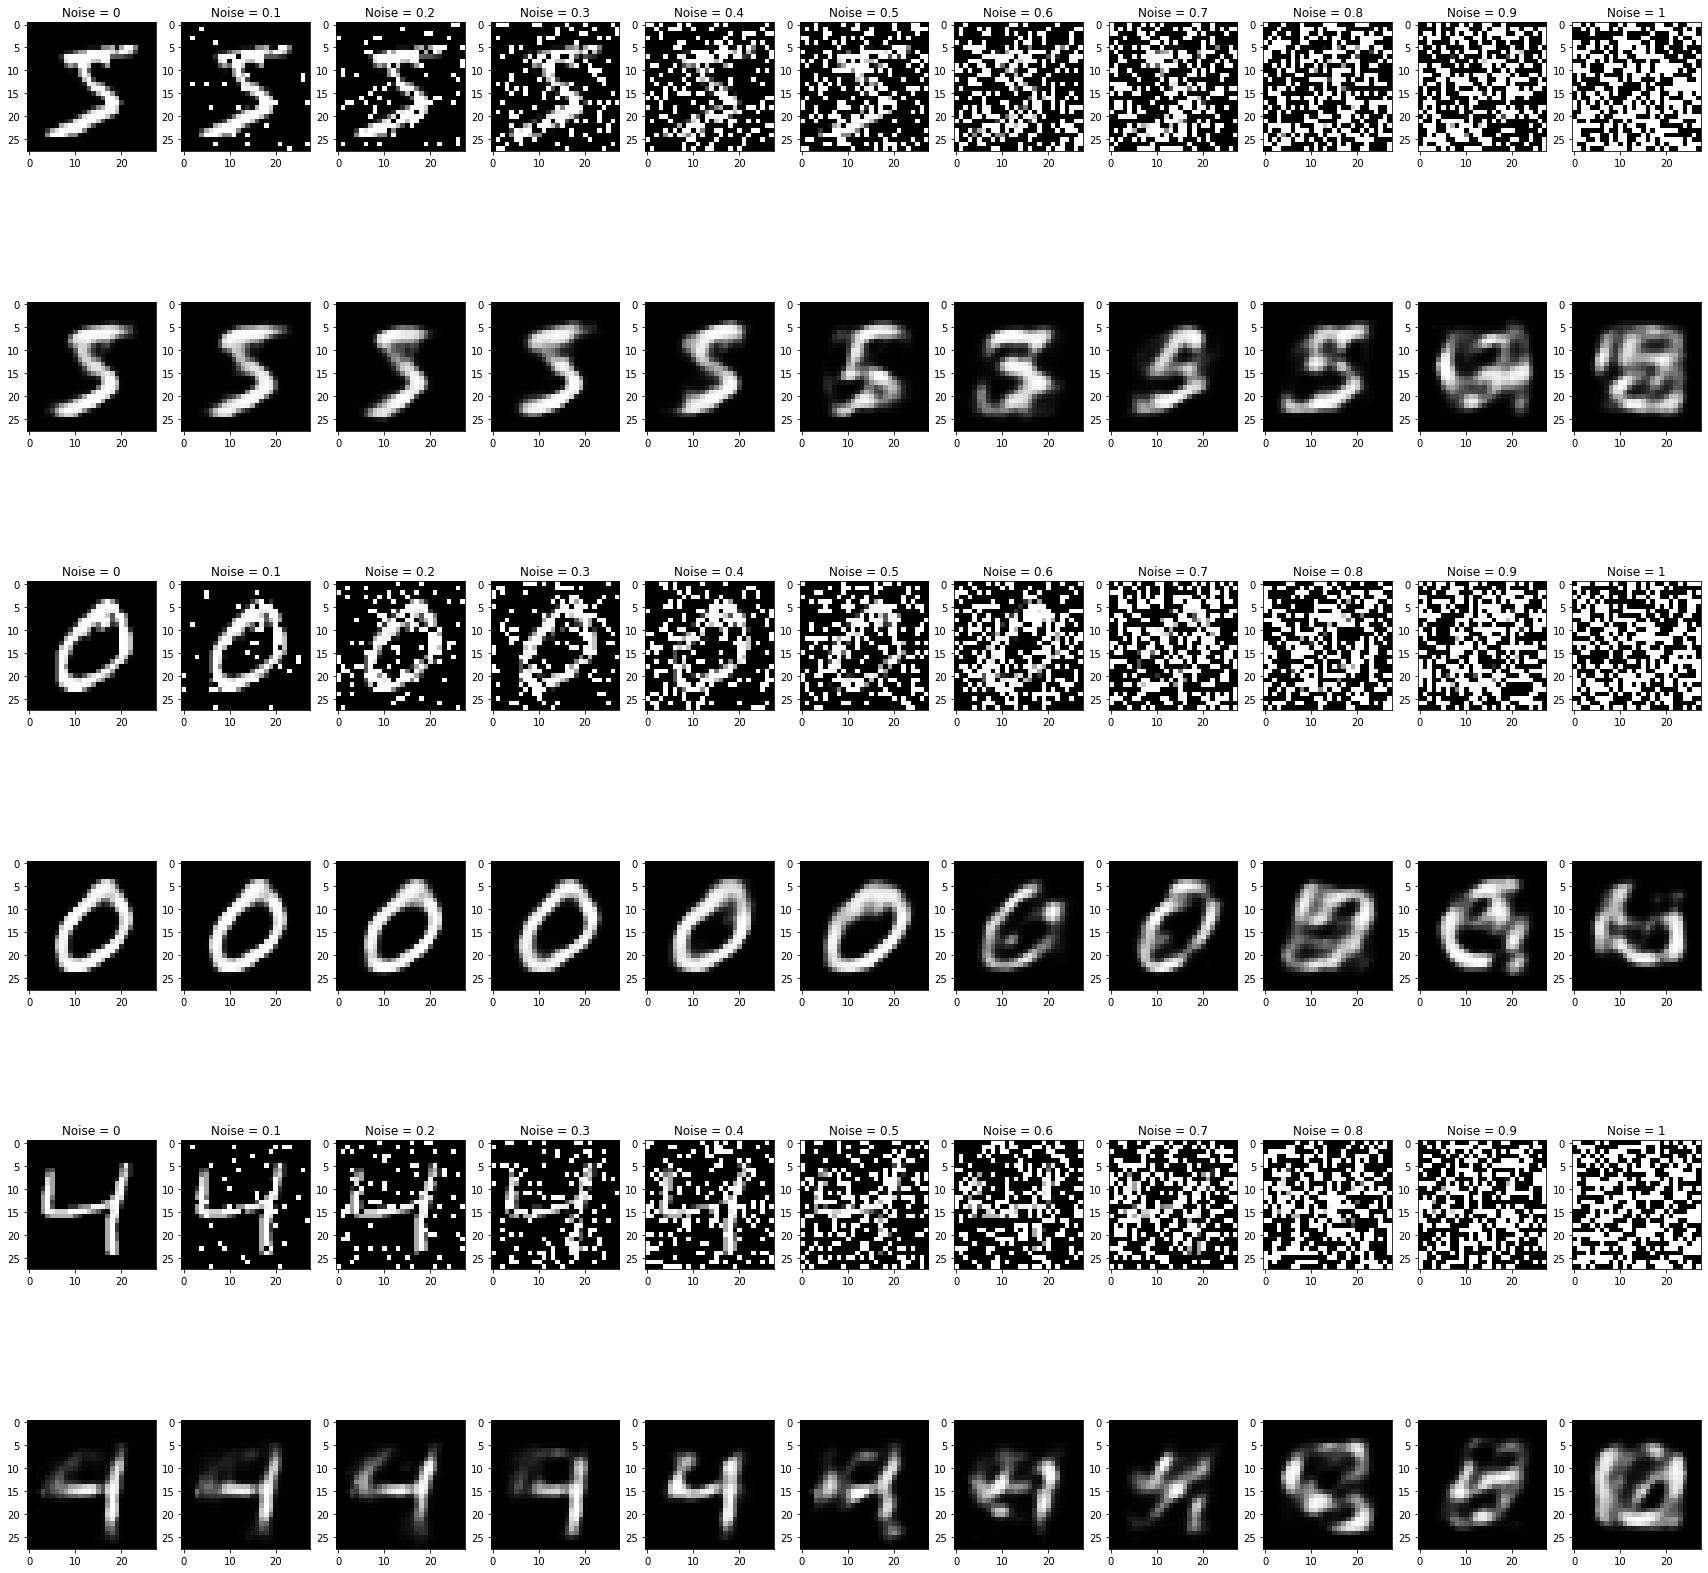

In [17]:
noise_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # Different noise levels 
rows = 6 # Example numbers * 2
columns = len(noise_levels) # Noise levels

# Plot data
f, ax = plt.subplots(nrows = rows, ncols = columns, figsize = (30,30)) 
for row in range(rows):
    for column in range(columns):
        # Salt & pepper images
        ax[0,column].imshow(tf.reshape(salt_and_pepper(flattened_x_train[0].reshape(1,-1), noise_level = noise_levels[column]),(28,28)), cmap='gray')
        ax[0,column].set_title('Noise = ' + str(noise_levels[column]))
        ax[2,column].imshow(tf.reshape(salt_and_pepper(flattened_x_train[1].reshape(1,-1), noise_level = noise_levels[column]),(28,28)), cmap='gray')
        ax[2,column].set_title('Noise = ' + str(noise_levels[column]))
        ax[4,column].imshow(tf.reshape(salt_and_pepper(flattened_x_train[2].reshape(1,-1), noise_level = noise_levels[column]),(28,28)), cmap='gray')
        ax[4,column].set_title('Noise = ' + str(noise_levels[column]))
    
        # Autoencoded image
        ax[1,column].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[0].reshape(1,-1),noise_level = noise_levels[column])), shape = (28,28)), cmap='gray')
        ax[3,column].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[1].reshape(1,-1),noise_level = noise_levels[column])), shape = (28,28)), cmap='gray')
        ax[5,column].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_train[2].reshape(1,-1),noise_level = noise_levels[column])), shape = (28,28)), cmap='gray')
    
plt.show()

In [23]:
autoencoder_accuracies = []
seasoned_accuracies = []

for column in range(columns):

    autoencoded_x_test = tf.reshape(autoencoder(salt_and_pepper(flattened_x_test, noise_level = noise_levels[column])), (10000,28,28,1))
    autoencoder_accuracies.append(model.evaluate(autoencoded_x_test, y_test, verbose=0))
    
    seasoned_x_test = tf.reshape(salt_and_pepper(flattened_x_test, noise_level = noise_levels[column]), (10000,28,28,1))
    autoencoder_accuracies.append(model.evaluate(seasoned_x, y_test, verbose=0))
    
plt.plot(noise_levels, autoencoded_accs, label="Denoised input")
plt.plot(noise_levels, seasoned_accs, label="Seasoned input")
plt.title("Model accuracy for original & noised inputs")
plt.legend()
plt.ylabel("acc")
plt.xlabel("noise_level")
plt.show()

NameError: name 'model' is not defined

In [24]:
encoded = encoder_only.predict(flattened_x_test)
decoded = decoder.predict(encoded)
decoded = decoded.reshape(decoded.shape[0], 28, 28)

def generate_digit(model, digit, decoded_img, threshold=0.99):
    np.random.shuffle(decoded_img)
    for img in decoded_img:
    
        imgreshape = img.reshape(28, 28, 1)
        
        predictions = model.predict(imgreshape)
        maxIndex = np.argmax(predictions)
        maxAcc = predictions[0, maxIndex]
    
        if (maxIndex == digit) and (maxAcc >= threshold):
            return img

plt.imshow(generate_digit(model, 4, decoded),  cmap='gray')
plt.show()

NameError: name 'model' is not defined